## Data visualization (relationship)

- The purpose is to learn about analysis and interpretation of relationship between variables using functions in R

### Import packages

In [1]:
install.packages('corrplot') 


The downloaded binary packages are in
	/var/folders/71/32h8kjzx1d957cbl0_xhpyvr0000gn/T//RtmpjuyHXe/downloaded_packages


In [2]:
library(tidyverse)
library(corrplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.92 loaded



### Configure defaults

In [3]:
options(repr.plot.width = 14, repr.plot.height = 6) # set plot size

### Read data

In [4]:
bankData <- read.csv('~/Downloads/bank-data.csv', sep = ';')
head(bankData)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


### Transform data

In [5]:
bankData %>%
mutate(
        age_range = cut(
            age,
            breaks = c(-Inf,20,30,40,50,60,Inf), 
            labels = c("<20","20-29","30-39","40-49","50-59",">60"
        )
    )
) -> bankData1
head(bankData1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<fct>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39
6,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,30-39


### Cross-tabulation
- Show count of each possible combination between 2 categorical variables value

In [6]:
table(bankData$marital, bankData$y)

          
              no   yes
  divorced  4585   622
  married  24459  2755
  single   10878  1912

In [7]:
table(bankData$marital, bankData$default)

          
              no   yes
  divorced  5079   128
  married  26766   448
  single   12551   239

In [8]:
table(bankData1$age_range, bankData1$y)

       
           no   yes
  <20      64    33
  20-29  5821  1112
  30-39 15875  1812
  40-49 10220  1019
  50-59  7256   811
  >60     686   502

### Count plot

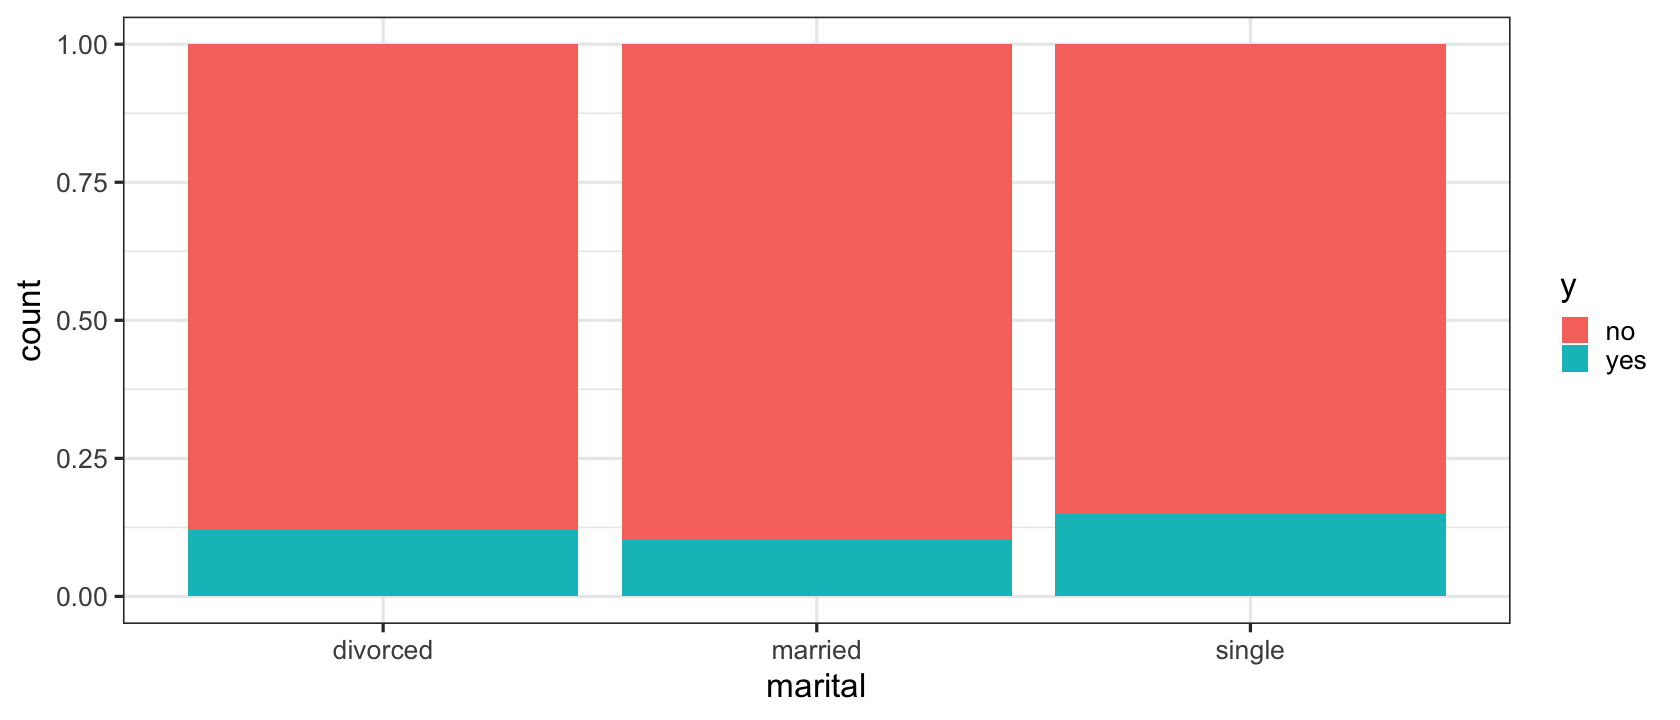

In [9]:
ggplot(bankData) + 
geom_bar(aes(x = marital, fill = y), position = 'fill') + 
theme_bw(base_size = 20)

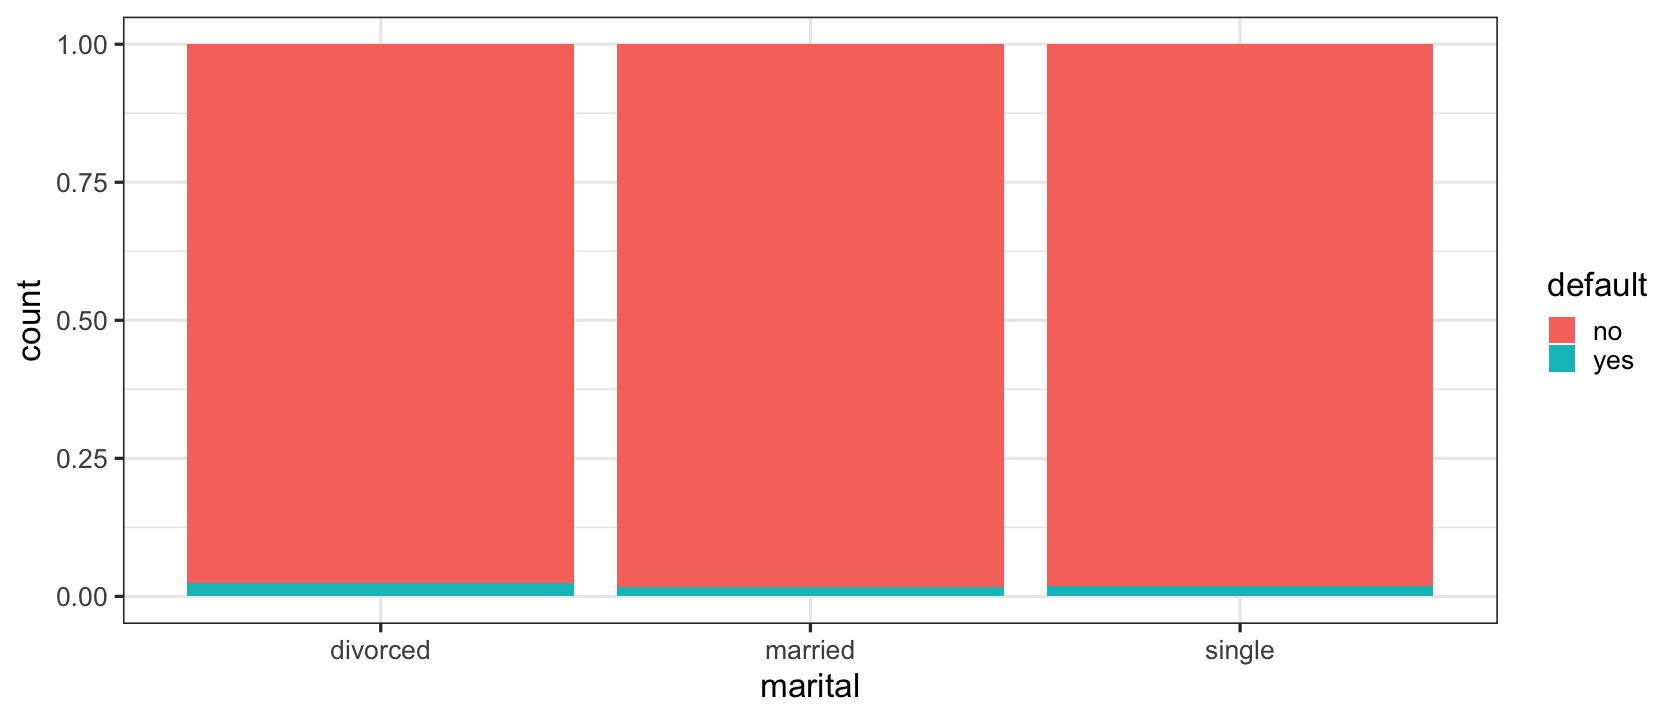

In [10]:
ggplot(bankData) + 
geom_bar(aes(x = marital, fill = default), position = 'fill') + 
theme_bw(base_size = 20)

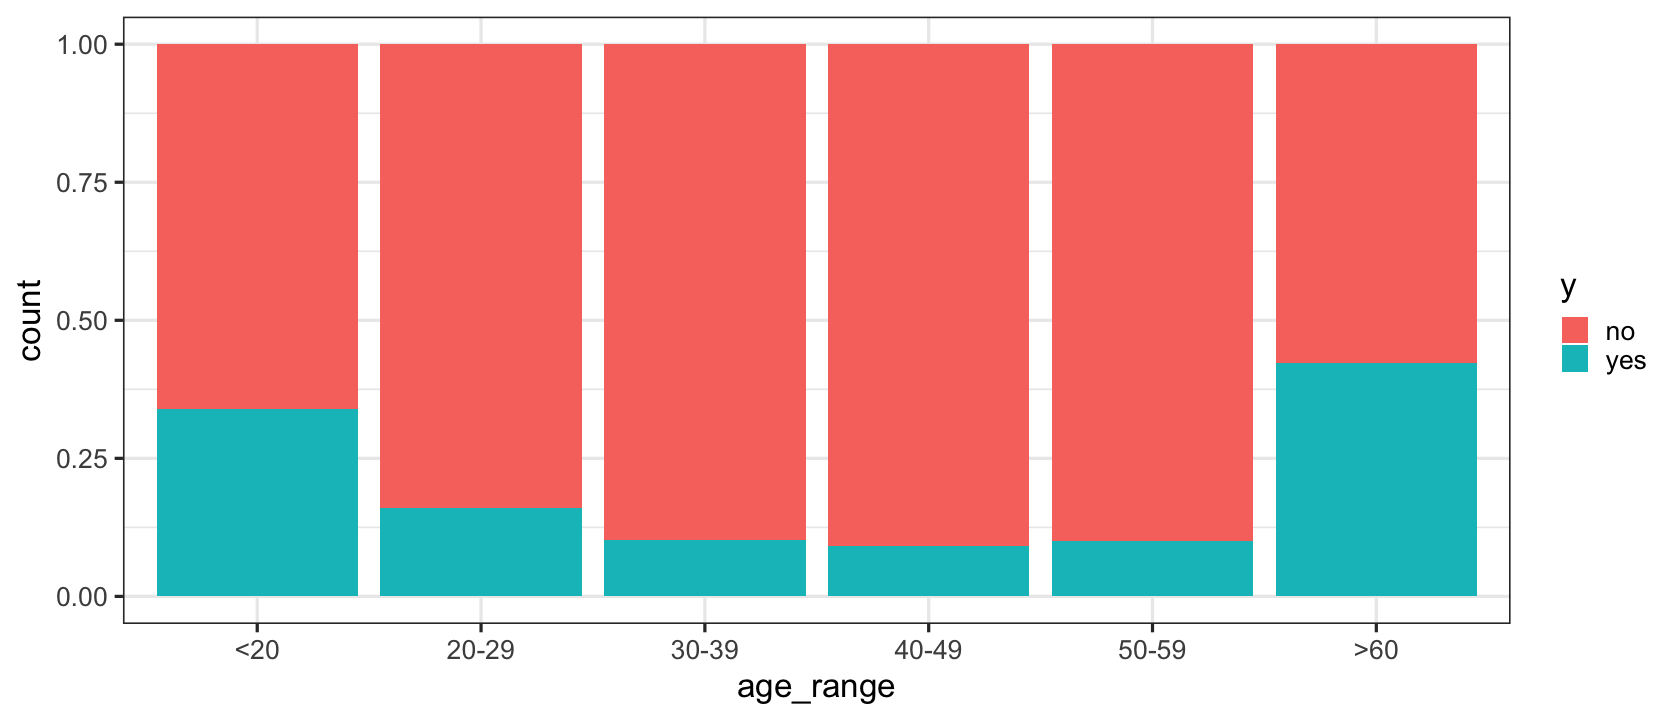

In [11]:
ggplot(bankData1, aes(x = age_range, fill = y)) +
geom_bar(position = "fill") +
theme_bw(base_size = 20)

### Chi-square statistics
- Tells whether or not there is a relationship between categorical variables in the cross classification table
- Smaller p-value indicates stronger relation between the categorical variables

In [12]:
chisq.test(
    table(bankData$marital, bankData$y)
)


	Pearson's Chi-squared test

data:  table(bankData$marital, bankData$y)
X-squared = 196.5, df = 2, p-value < 2.2e-16


In [13]:
chisq.test(
    table(bankData$marital, bankData$default)
)


	Pearson's Chi-squared test

data:  table(bankData$marital, bankData$default)
X-squared = 16.719, df = 2, p-value = 0.0002341


- To measure relationship between categorical and numerical variables, we need to bin numerical variables into intervals

In [14]:
chisq.test(table(bankData1$age_range, bankData1$y)) # age variable was binned into age range


	Pearson's Chi-squared test

data:  table(bankData1$age_range, bankData1$y)
X-squared = 1379.8, df = 5, p-value < 2.2e-16


### Correlation coefficient
- Measures the strength and direction of a linear relationship between two numerical variables
- Sample correlation coefficient is denoted by r
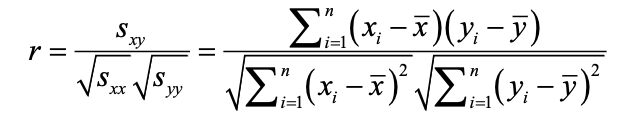
- The range of the correlation coefficient is from -1 to 1
    - r close to 1 means strong positive linear relationship (variables change in the same direction)
    - r close to -1 means strong negative linear relationship (variables change in different direction)
    - r equal to 0 means no linear relationship

- Strength of linear relationship
    - weak : `0 <= |r| <= 0.5 `
    - strong : `0.8 <= |r| <= 1`
    - moderate otherwise
- correlation does not mean causation

In [15]:
data(mtcars)
cor(mtcars$mpg,mtcars) # correlation of mpg with each variable

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,-0.852162,-0.8475514,-0.7761684,0.6811719,-0.8676594,0.418684,0.6640389,0.5998324,0.4802848,-0.5509251


In [16]:
res <- cor(mtcars) # correlation between each pair of column
res

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


### Correlation coefficient plot

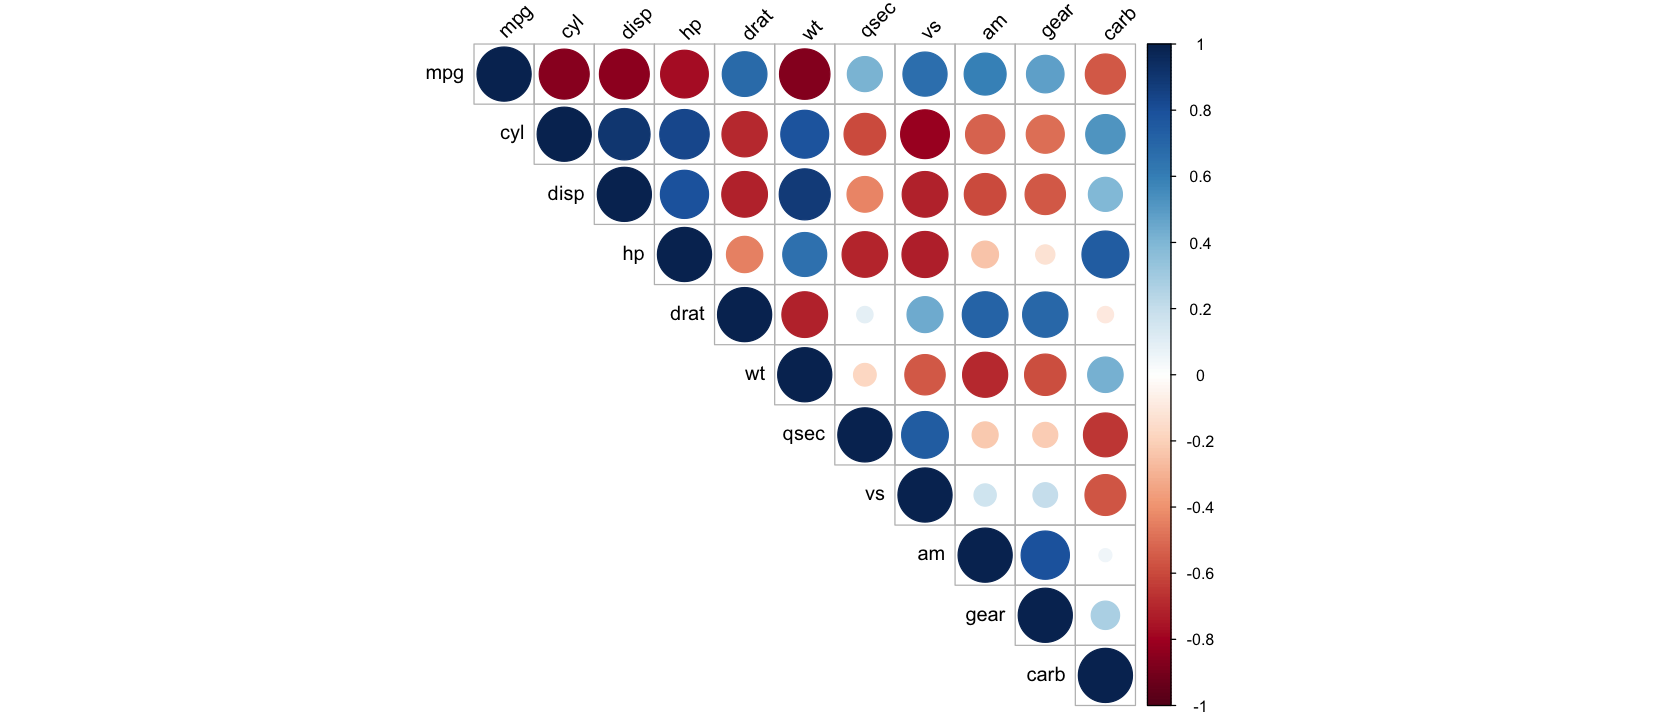

In [17]:
corrplot(
    res,
    type = "upper", 
    tl.col = "black", # black tick label color
    tl.srt = 45 # rotate tick labels
)

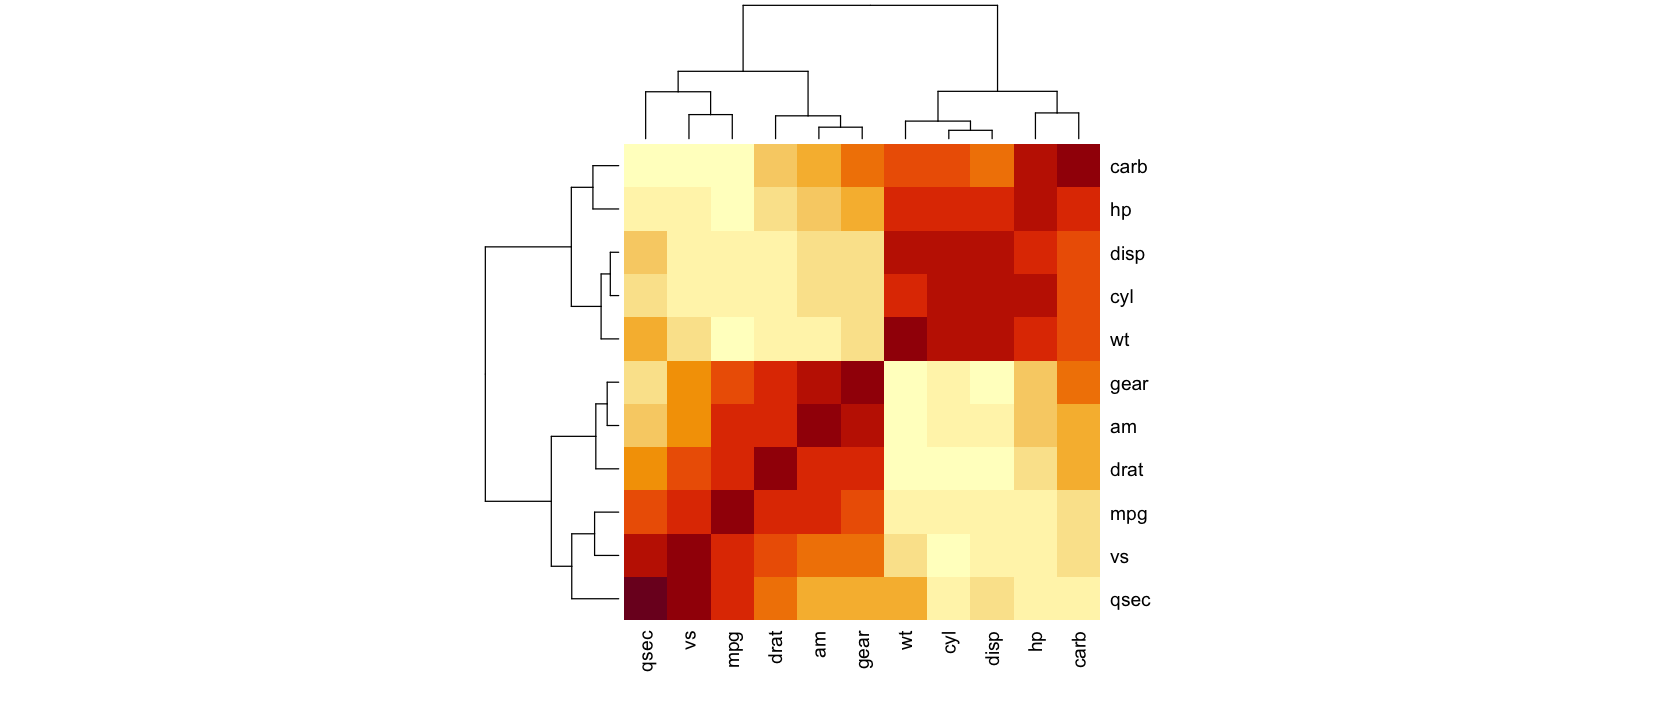

In [18]:
heatmap(x = res)

### Bivariate plot


#### Negative relationship

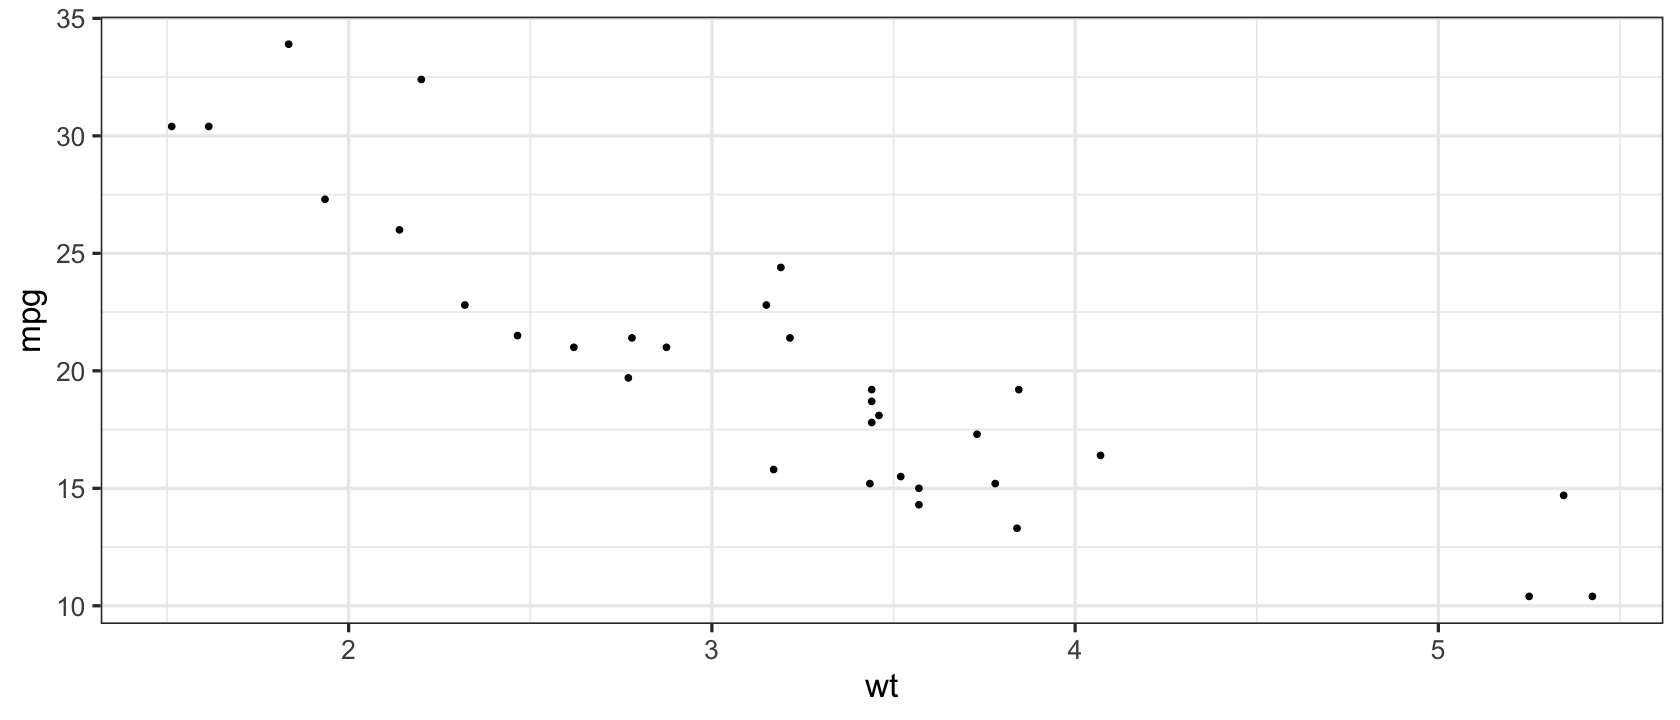

In [19]:
ggplot(mtcars) +
geom_point(mapping = aes(x = wt, y = mpg)) +
theme_bw(base_size = 20)

#### Positive relationship

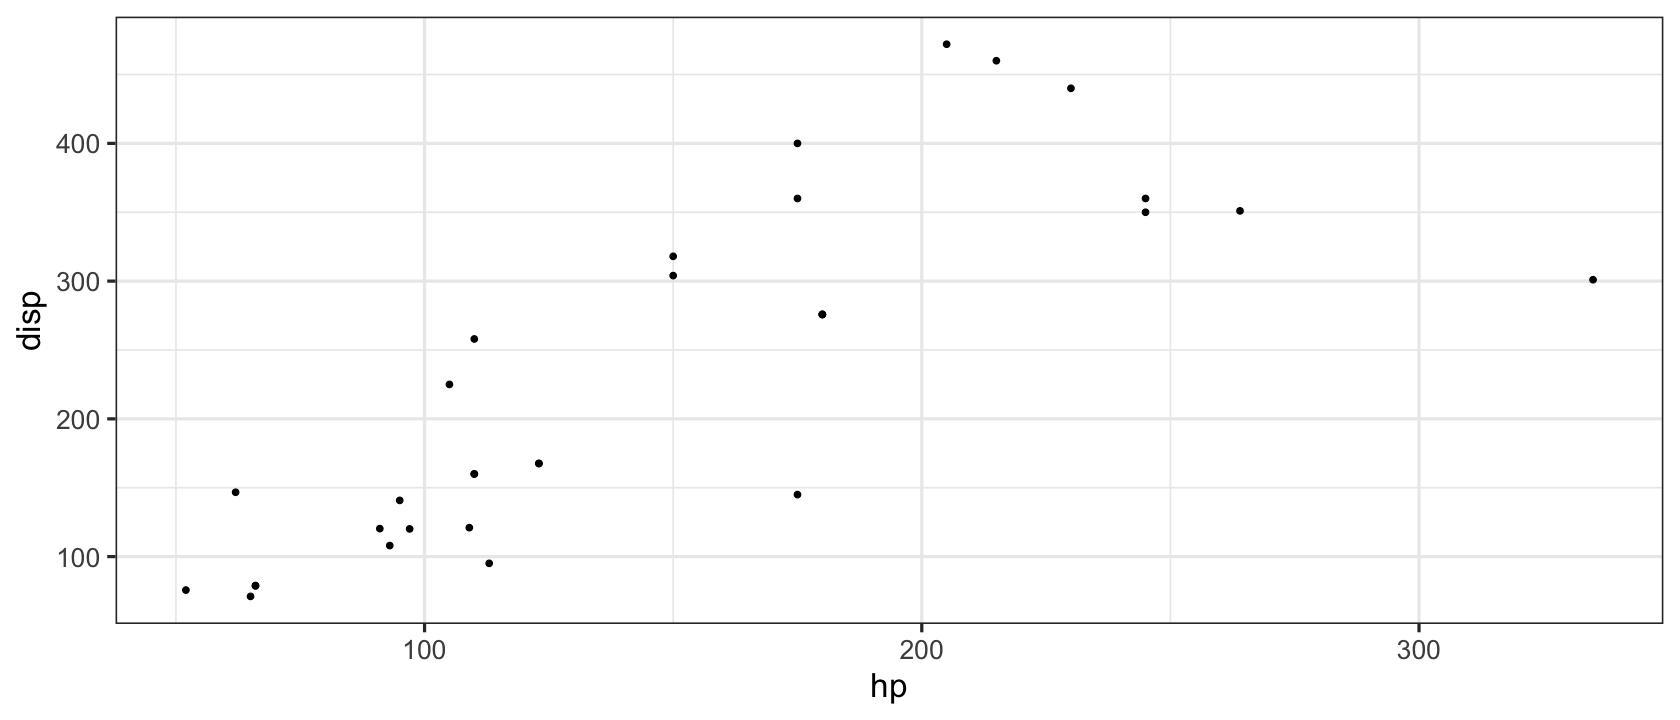

In [20]:
ggplot(mtcars) +
geom_point(mapping = aes(x = hp, y = disp)) +
theme_bw(base_size = 20)

#### No relationship

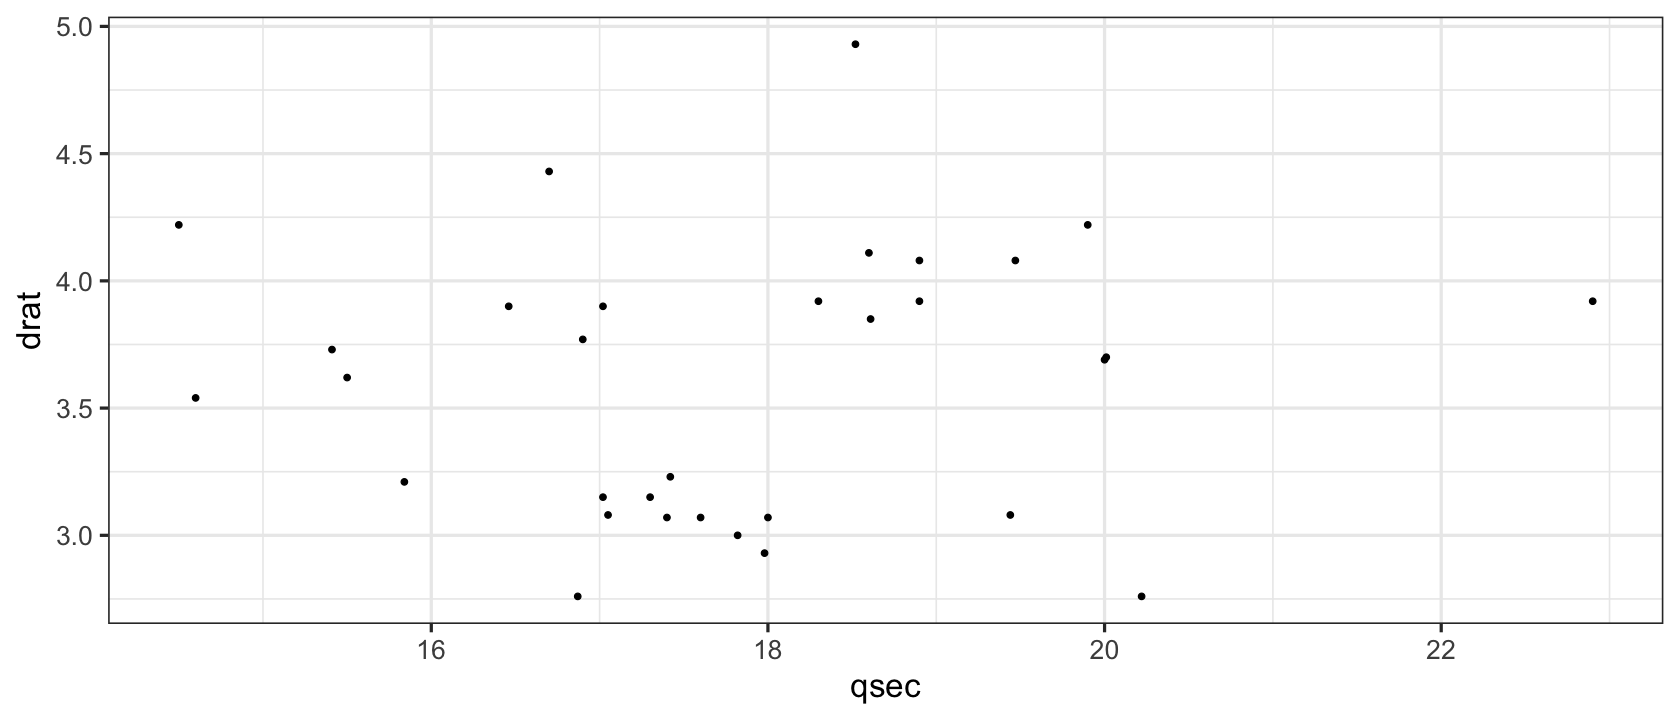

In [21]:
ggplot(mtcars) +
geom_point(mapping = aes(x = qsec, y = drat)) +
theme_bw(base_size = 20)

### Density plot as heat map

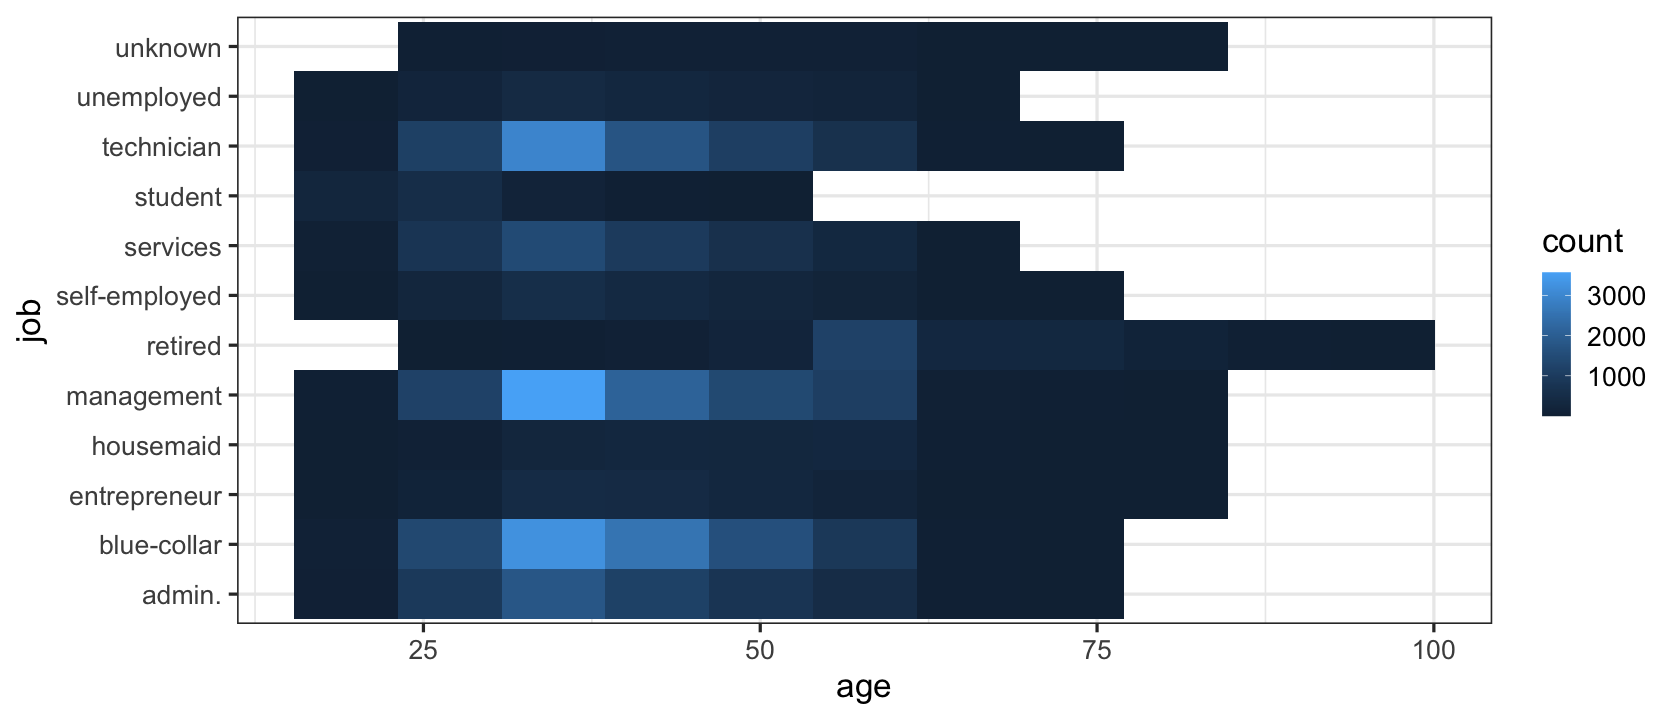

In [22]:
ggplot(bankData, aes(x=age, y=job)) + 
geom_bin2d(bins=10) +
theme_bw(base_size = 20)

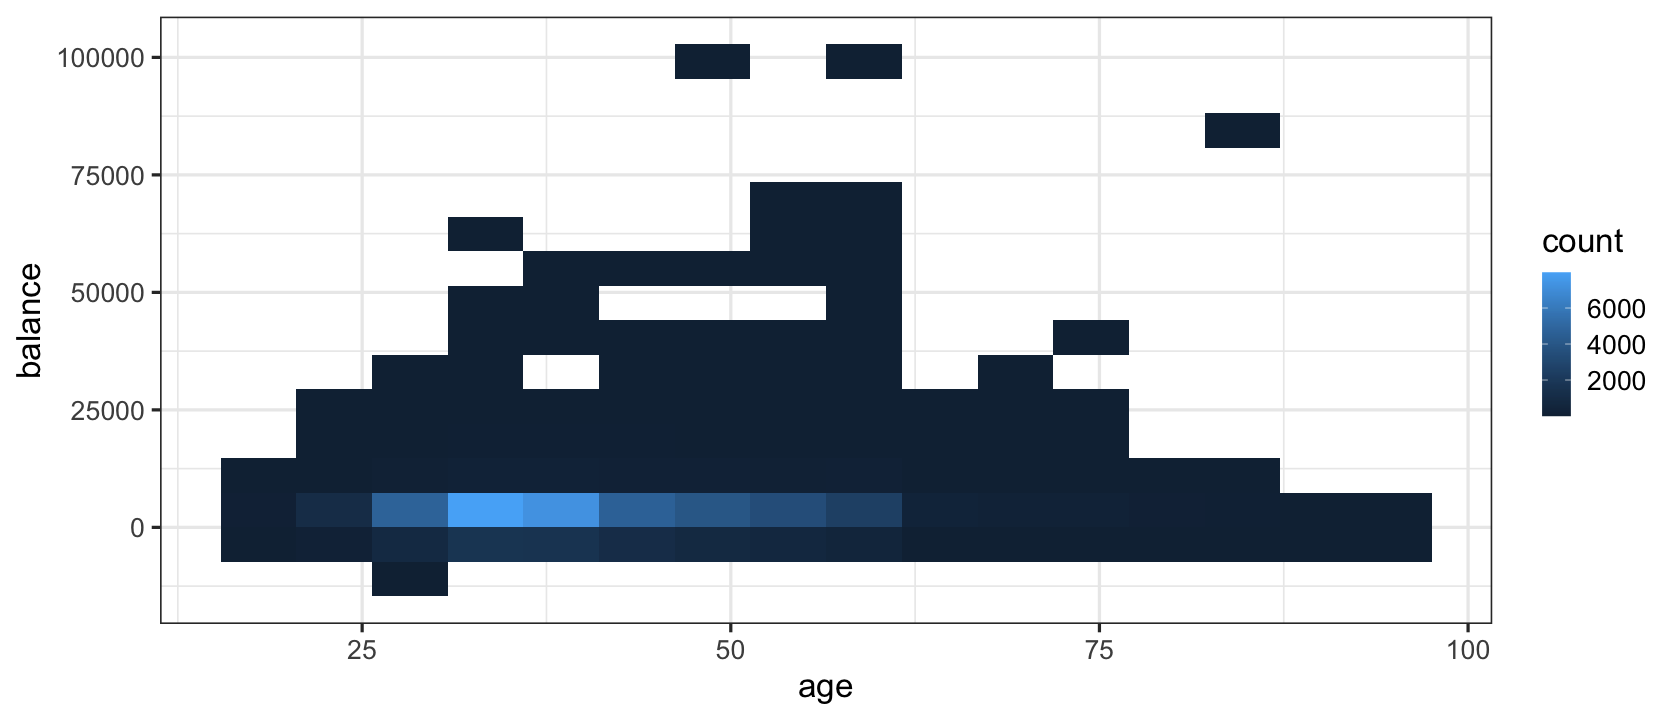

In [24]:
ggplot(bankData, aes(x=age, y=balance)) + 
geom_bin2d(bins=15) +
theme_bw(base_size = 20)